In [ ]:
import pandas as pd
import numpy as np
import pymc3 as pm
import arviz as az
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/Users/son520804/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/Users/son520804/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


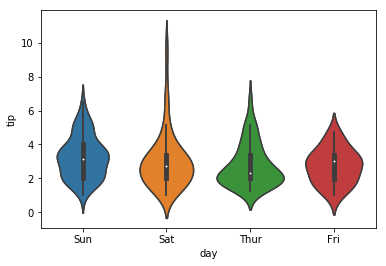

In [ ]:
# Violin plot
sns.violinplot(x = 'day', y = 'tip', data = tips)
plt.show()

In [ ]:
tip = tips['tip'].values
idx = pd.Categorical(tips['day'],
                     categories = ['Thur', 'Fri', 'Sat', 'Sun']).codes
groups = len(np.unique(idx))

In [ ]:
with pm.Model() as comparing_groups:
    # The prior distribution of mu is normal distribution, note that there are 4
    # groups to be compared, so shape equals groups
    mu = pm.Normal('mu', mu = 0, sd = 10, shape = groups)
    # Weakly-informative prior
    sigma = pm.HalfNormal('sigma', sd = 10, shape = groups)
    y = pm.Normal('y', mu = mu[idx], sd = sigma[idx], observed = tip)
    
    trace = pm.sample(3000, chains = 2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]
Sampling 2 chains, 0 divergences: 100%|██████████| 7000/7000 [00:09<00:00, 704.25draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c22d31470>,
      dtype=object)

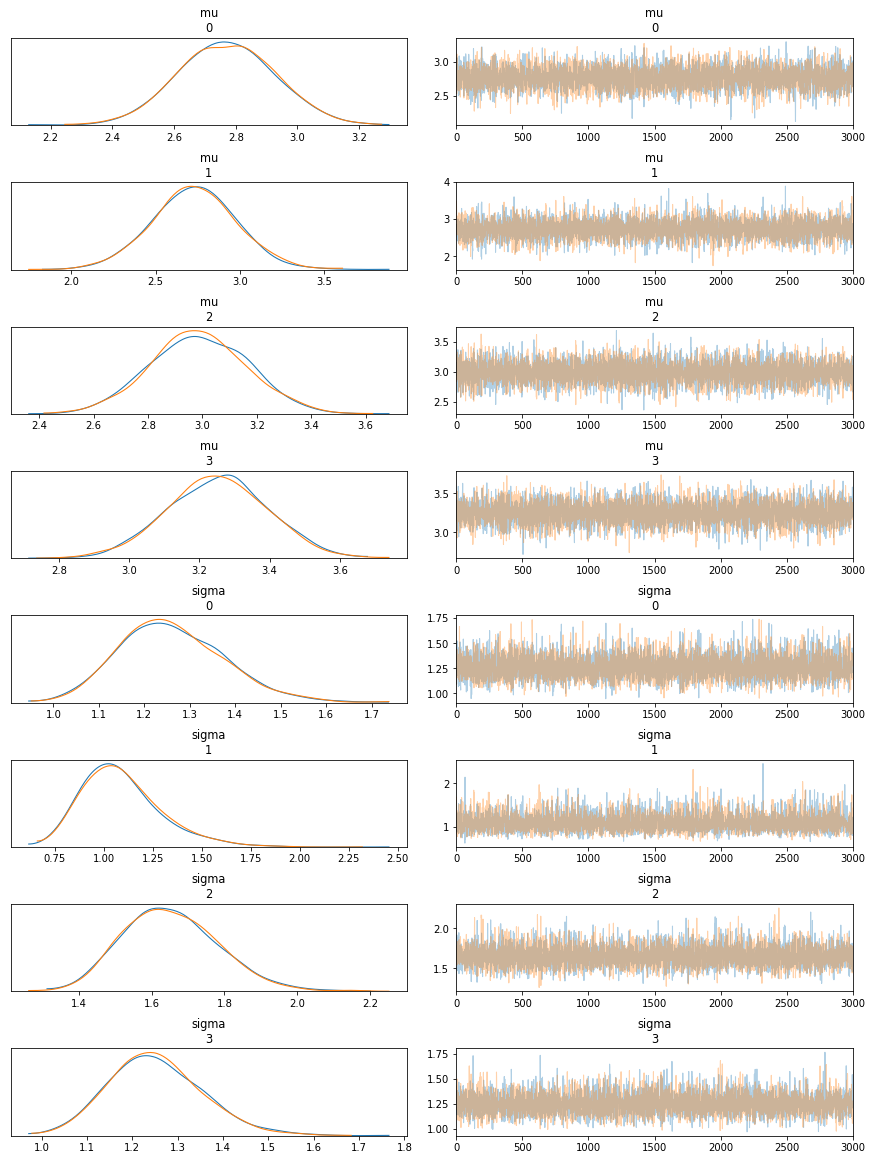

In [ ]:
az.plot_trace(trace)
plt.show()

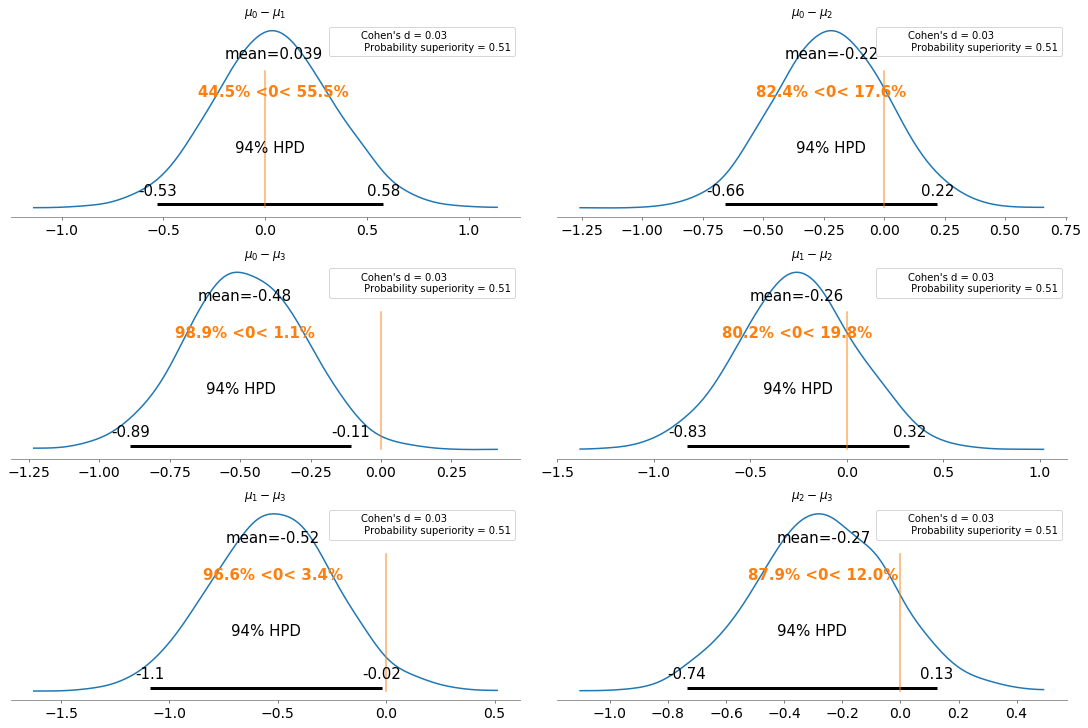

In [ ]:
_, ax = plt.subplots(3, 2, figsize = (15, 10), constrained_layout = True)

# We use a list comprehension to set up a pairwise group comparison. The design makes 
# the same group won't be simultaneously chosen 
comparisons = [(i, j) for i in range(4) for j in range(i+1, 4)]

# We create another list comprehension to place the position of Cohen's d plot
pos = [(k, l) for k in range(3) for l in (0, 1)] 

for (i, j), (k, l) in zip(comparisons, pos):
    means_diff = trace['mu'][:, i] - trace['mu'][:, j]
    # Compute the posterior distribution of Cohen's d statistics and use Cohen's d values 
    # to computer the posterior of probability of superiority. 
    cohen_d = (mean_diff / np.sqrt((trace['sigma'][:, i]**2 + trace['sigma'][:, j]**2) / 2)).mean()
    prob_superiority = stats.norm.cdf(cohen_d / (2**0.5))
    
    az.plot_posterior(means_diff, ref_val = 0, ax = ax[k, l])
    ax[k, l].set_title(f'$\mu_{i} - \mu_{j}$')
    ax[k, l].plot(0, 
                  label = f"Cohen's d = {cohen_d:.2f} \n Probability superiority = {prob_superiority:.2f}",
                  alpha = 0)
    ax[k, l].legend()
plt.show()
    
    
    
    

In [ ]:
import os

try:
    JUPYTER_ROOT_DIRECTORY
except NameError: 
    JUPYTER_ROOT_DIRECTORY = os.getcwd()

In [ ]:
!which jupyter

/Library/Frameworks/Python.framework/Versions/2.7/bin/jupyter


In [ ]:
!jupyter --paths

config:
    /Users/son520804/.jupyter
    /Library/Frameworks/Python.framework/Versions/2.7/etc/jupyter
    /usr/local/etc/jupyter
    /etc/jupyter
data:
    /Users/son520804/Library/Jupyter
    /Library/Frameworks/Python.framework/Versions/2.7/share/jupyter
    /usr/local/share/jupyter
    /usr/share/jupyter
runtime:
    /Users/son520804/Library/Jupyter/runtime


In [ ]:
!jupyter notebook --generate-config

Writing default config to: /Users/son520804/.jupyter/jupyter_notebook_config.py


In [ ]:
!jupyter notebook --help-all

The Jupyter HTML Notebook.

This launches a Tornado based HTML Notebook Server that serves up an
HTML5/Javascript Notebook client.

Subcommands
-----------

Subcommands are launched as `jupyter-notebook cmd [args]`. For information on
using subcommand 'cmd', do: `jupyter-notebook cmd -h`.

stop
    Stop currently running notebook server for a given port
password
    Set a password for the notebook server.
list
    List currently running notebook servers.

Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--script
    DEPRECATED, IGNORED
--pylab
    DISABLED: use %pylab or %matplotlib in the notebook to enable matplotlib.
--debug
    set log level to logging.DEBUG (maximize logging output)
--no-browser
    Don't open the notebook in a browser after startup.
--allow-root
    Allow the notebook to be run from root user.
-y
    Answer y